# Prepare functions

# Setup

In [2]:
import sys
sys.path.insert(1, '/users/genomics/xoel/canonades/bioinforgalician/src/python/celloracle')

In [3]:
import os

subset = 'NeuralPCW20'
os.chdir(f'/users/genomics/xoel/codebases/co_new/data/{subset}/')

In [4]:
new_dir = f'/users/genomics/xoel/codebases/co_new/data_foxg1/{subset}/'
os.makedirs(new_dir, exist_ok=True)

In [5]:
import scanpy as sc
sc.set_figure_params(
    scanpy=True,
    dpi=80, 
    dpi_save=300, 
    frameon=True,
    vector_friendly=True, 
    fontsize=14, 
    figsize=None, 
    color_map=None,
    facecolor=None, 
    transparent=False, 
    ipython_format='png2x')
sc.settings.verbosity=4
sc.settings.autosave=True
sc.settings.autoshow=True

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [6]:
n_cores = min(int(os.getenv('SLURM_CPUS_PER_TASK')) -4 or 18, 96)


In [7]:
groups = {
    'vRG': ['vRG E', 'vRG L'],
    'vtRG': ['vRG E', 'vRG L', 'tRG'],
    'oRG': ['oRG E', 'oRG L'],
    'RG E': ['vRG E', 'vRG E'],
    'RG L': ['vRG E', 'vRG L'],
    'RGC': ['vRG E','vRG L','tRG','oRG E','oRG L'],
    'Neural': ['Neu E', 'nIPC', 'GluN4', 'GluN5'], # 
    'GluN': ['GluN4', 'GluN5']
}

### Genes to keep: DE TFs ASD/Ctrl

In [8]:
import pandas as pd

In [9]:
# with open('/users/genomics/xoel/codebases/ASD_IPSC_sept/data/bulk_de_tfs.txt', 'rt') as f:
with open('/users/genomics/xoel/codebases/co_new/src/FOXG1_subanalysis/tfs.txt', 'rt') as f:
    genes_to_keep = [x.strip() for x in f.readlines()]
genes_to_keep

# Previous run
# ASD_DEA = pd.read_excel('/users/genomics/xoel/codebases/ASD_IPSC_june/DE_DS/ASD_vs_Ctrl_markers.Annotated.xlsx',
#                         sheet_name='TFs_Filtered_with_padj')
# genes_to_keep = ASD_DEA['gene'].unique().tolist()
# genes_to_keep

# genes_to_keep =
# ['ATOH8',
#  'CEBPZ',
#  'DBX1',
#  'FOXD1',
#  'FOXG1',
#  'MECOM',
#  'MYC',
#  'SALL4',
#  'SON',
#  'SP8',
#  'YBX3',
#  'ZNF24',
#  'ZNF302',
#  'ZNF572',
#  'ZNF703',
#  'ZNF718',
#  'ZNF775']

['DMRTA1',
 'EGR1',
 'EMX2',
 'FEZF1',
 'FEZF2',
 'FOXB1',
 'FOXG1',
 'HES1',
 'HES4',
 'HES5',
 'IRX3',
 'JUND',
 'LHX2',
 'MEIS2',
 'NR2F1',
 'NR2F2',
 'NR6A1',
 'PAX6',
 'PEG3',
 'PHOX2B',
 'PITX2',
 'POU3F1',
 'POU3F2',
 'RAX',
 'RFX4',
 'SALL4',
 'SIX3',
 'SOX2',
 'SOX4',
 'TAL2',
 'VAX2',
 'YBX3',
 'ZNF22',
 'ZNF503',
 'ZNF703']

# **Part 2 //** Prepare RNA data

In [10]:
import scanpy as sc
import prepare_rna
%matplotlib inline

In [10]:
sorted(os.listdir())

['.ipynb_checkpoints',
 'ATAC.cell_metadata.tsv',
 'ATAC.peak_metadata.tsv',
 'ATAC.unprocessed.tsv',
 'Gradient.Perturbation.celloracle.gradient',
 'Links.Perturbation.celloracle.links',
 'Links.celloracle.links',
 'Oracle.Perturbation.celloracle.oracle',
 'Oracle.celloracle.oracle',
 'RNA.processed.h5ad',
 'RNA.unprocessed.h5ad',
 'RootCellSelection.html',
 'Rplots.pdf',
 'base_grn.coaccessibility=0.8.score=8.base_grn.parquet',
 'celloracle_tfinfo.coaccessibility=0.8.score=8.celloracle.tfinfo',
 'cicero.log',
 'cicero_connections.csv',
 'cicero_connections.rds',
 'cicero_peaks.csv',
 'cicero_umap.pdf',
 'cluster_GRN',
 'coaccessible_peaks.coaccessibility=0.8.csv',
 'figures',
 'network_plots',
 'perturbations']

In [11]:
adata_file = 'RNA.unprocessed.h5ad'
adata_complete = sc.read_h5ad(adata_file)

In [12]:
for i, g in enumerate(genes_to_keep):
    print(f'{i+1}.\t{g} is {"NOT " if not g in adata_complete.var_names else ""}in the dataset')

1.	DMRTA1 is in the dataset
2.	EGR1 is in the dataset
3.	EMX2 is in the dataset
4.	FEZF1 is in the dataset
5.	FEZF2 is in the dataset
6.	FOXB1 is in the dataset
7.	FOXG1 is in the dataset
8.	HES1 is in the dataset
9.	HES4 is in the dataset
10.	HES5 is in the dataset
11.	IRX3 is in the dataset
12.	JUND is in the dataset
13.	LHX2 is in the dataset
14.	MEIS2 is in the dataset
15.	NR2F1 is in the dataset
16.	NR2F2 is in the dataset
17.	NR6A1 is in the dataset
18.	PAX6 is in the dataset
19.	PEG3 is in the dataset
20.	PHOX2B is in the dataset
21.	PITX2 is in the dataset
22.	POU3F1 is in the dataset
23.	POU3F2 is in the dataset
24.	RAX is in the dataset
25.	RFX4 is in the dataset
26.	SALL4 is in the dataset
27.	SIX3 is NOT in the dataset
28.	SOX2 is in the dataset
29.	SOX4 is in the dataset
30.	TAL2 is in the dataset
31.	VAX2 is in the dataset
32.	YBX3 is in the dataset
33.	ZNF22 is in the dataset
34.	ZNF503 is in the dataset
35.	ZNF703 is in the dataset


In [13]:
dict(
    RGCmaturationExtended = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    RGCmaturation = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    NeuralPCW16 = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    # NeuralPCW20 = 'hft_w20_p3_r1_AATGACCTCTACCAGA',
    NeuralPCW20 = 'hft_w20_p3_r2_CTATCCGAGGCGCTCT',
    Gliogenesis = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    GliogenesisExtended = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
)

{'RGCmaturationExtended': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'RGCmaturation': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'NeuralPCW16': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'NeuralPCW20': 'hft_w20_p3_r2_CTATCCGAGGCGCTCT',
 'Gliogenesis': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'GliogenesisExtended': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC'}

### PIPE [1] PREPROCESSING DATA


  0%|          | 0/8 [00:00<?, ?it/s]

[1] Saving raw counts
[2] Computing QC
[3] Filtering genes: total_counts > 1
[4] Normalizing per cell using total_counts
normalizing by total count per cell
    finished (0:00:10): normalized adata.X and added    'total_counts', counts per cell before normalization (adata.obs)
[5] Computing highly variable genes and filtering to top 3000
(7437, 16854)
extracting highly variable genes
    the 3000 top genes correspond to a normalized dispersion cutoff of 1.51889967918396
    finished (0:00:02)


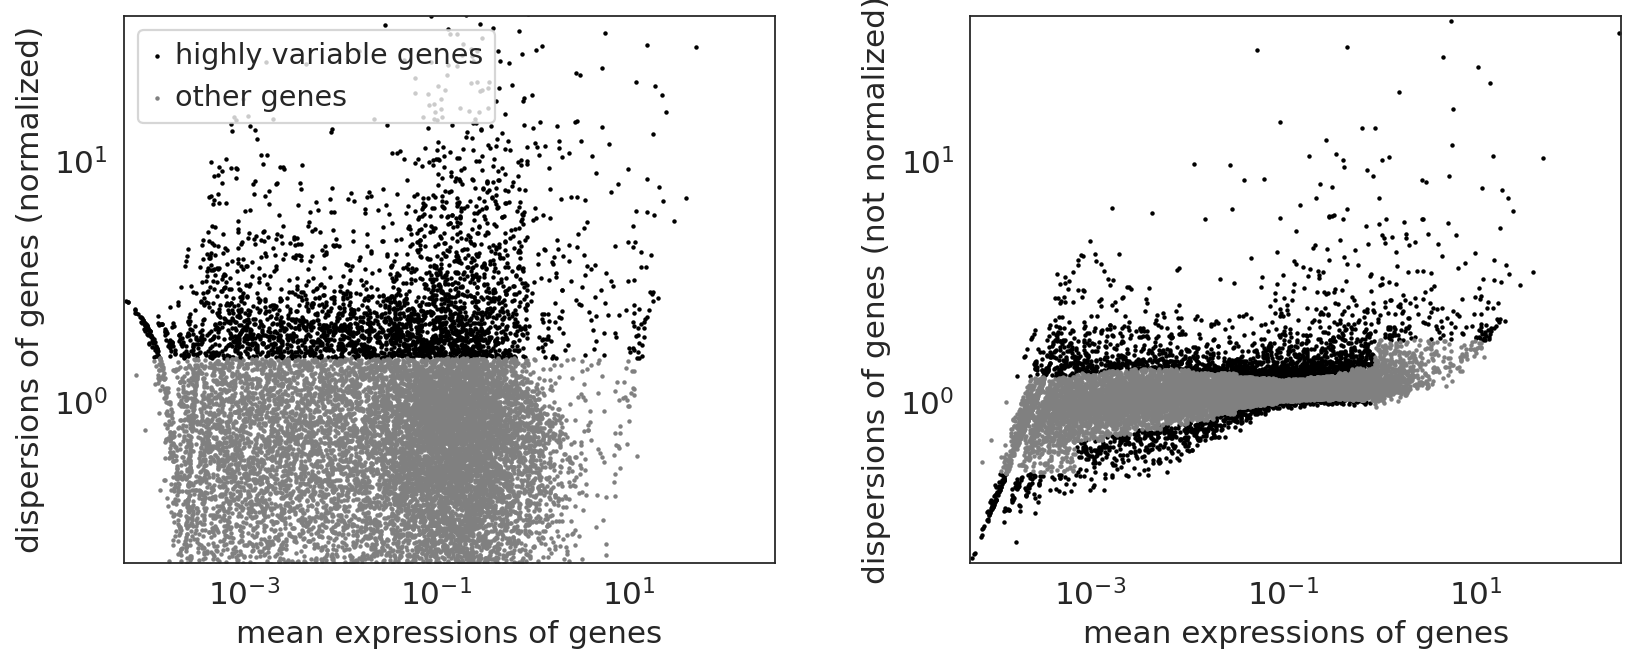

Keeping provided genes if available...
(7437, 3016)
[6] Normalizing per cell again using total_counts
normalizing by total count per cell
    finished (0:00:04): normalized adata.X and added    'total_counts', counts per cell before normalization (adata.obs)
[7] Log1p transformation
[8] Scaling
### PIPE [2] EMBEDDING DATA


  0%|          | 0/8 [00:00<?, ?it/s]

[1] Computing PCA
computing PCA
    with n_comps=50
    finished (0:00:06)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


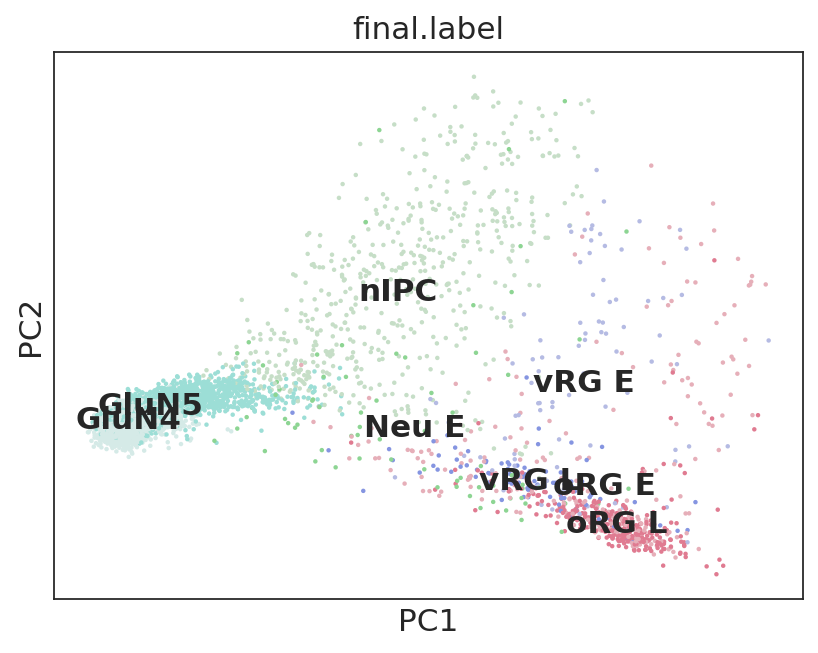

[2] Computing neighbors
computing neighbors
    computing neighbors
    computed neighbors (0:00:02)
    computed connectivities (0:00:27)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
[3] Computing diffusion map
computing Diffusion Maps using n_comps=30(=n_dcs)
        initialized `.distances` `.connectivities` 
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9977275  0.99332154 0.9919933  0.9858084  0.98006874
     0.97775596 0.97508633 0.9679994  0.96328455 0.9563931  0.95136493
     0.9485008  0.94319135 0.94163555 0.9377189  0.93318355 0.9305852
     0.9295126  0.9253122  0.9232677  0.9206556  0.9151484  0.91449505
     0.90984267 0.9093865  0.9041788  0.90268505 0.89914644 0.8982178 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matr

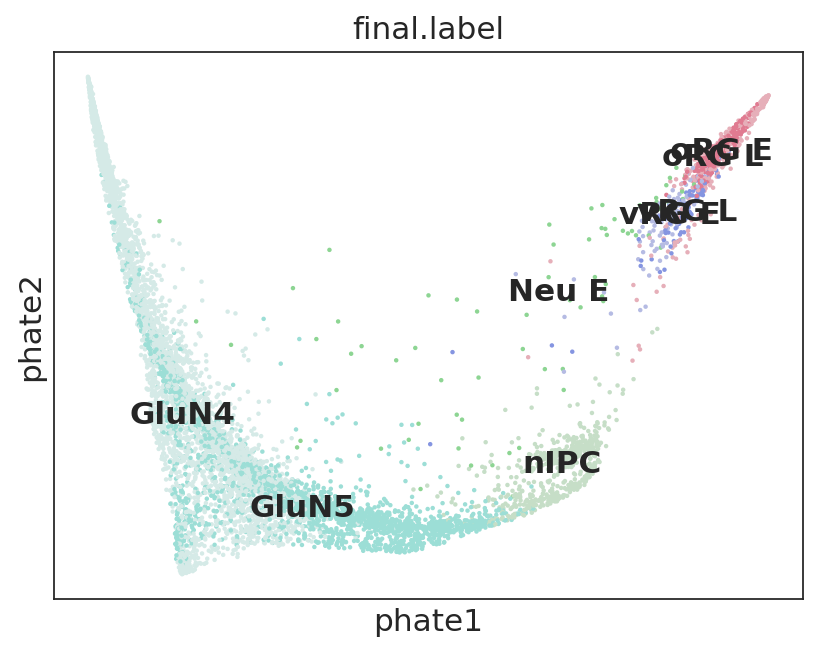

### PIPE [3] COMPUTING PSEUDOTIME


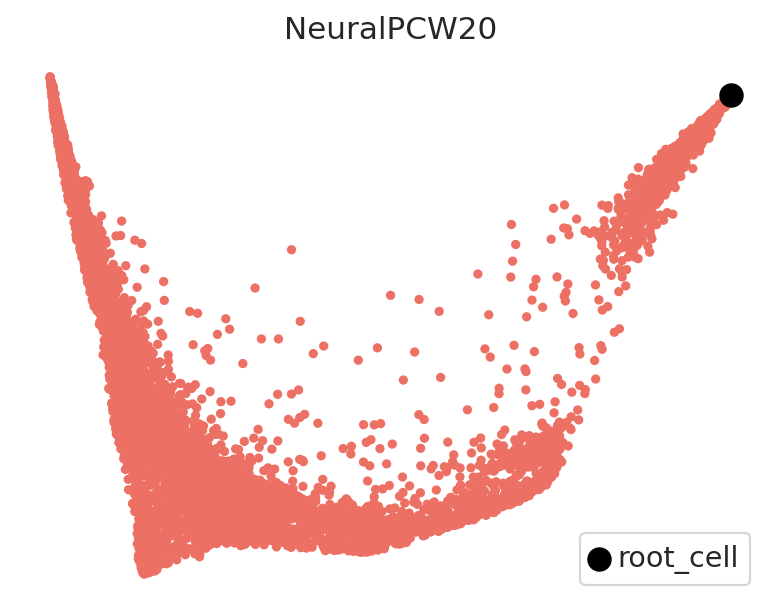

        initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


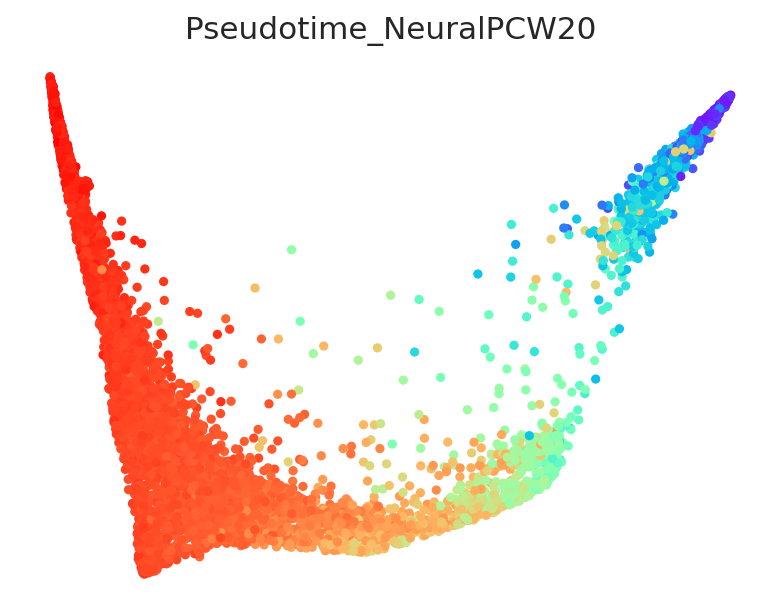

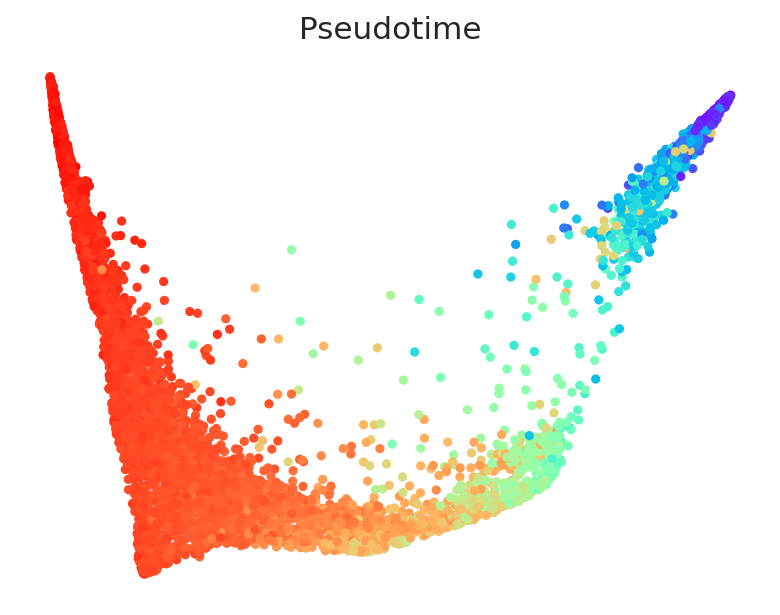

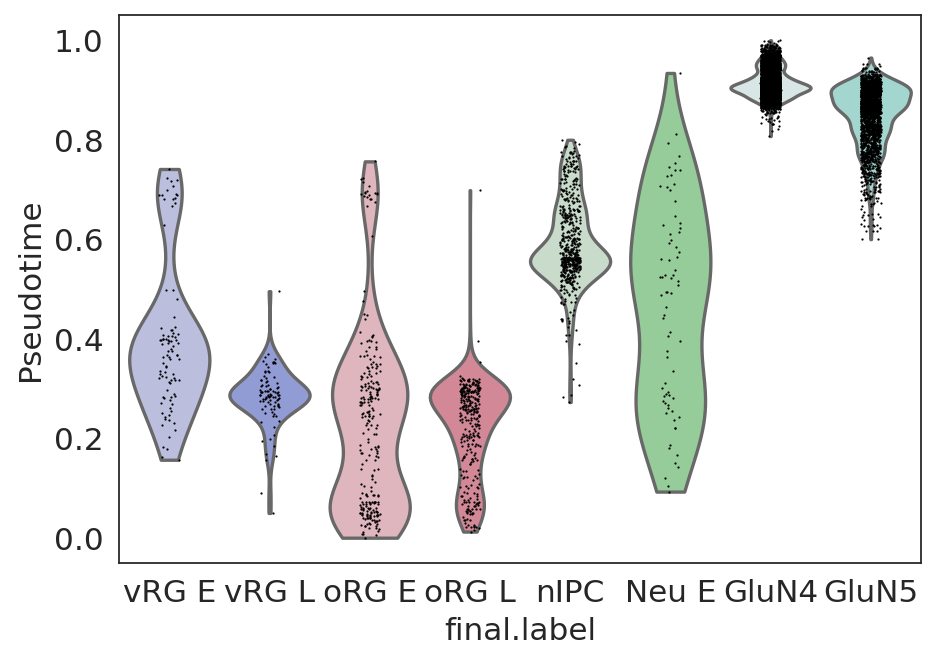

### PIPE [4] SAVING DATA


In [14]:
adata = prepare_rna.prepare_adata(
    
    adata_complete,
    group_by='final.label',
    save_dir=new_dir,
    
    min_total_counts_per_cell=1,
    key_n_counts='total_counts',
    n_top_genes=3000,
    genes_to_keep=genes_to_keep,

    # prefix='test',

    nn_1_n_neighbors=20,
    nn_1_use_rep='X_pca',
    nn_1_n_pcs=10,
    dm_n_comps=30,
    nn_2_n_neighbors=100,

    phate_run_on='X_scvi',
    phate_knn=100, 
    phate_n_pca=50, 
    phate_decay=15, 
    phate_t='auto',
    
    skip_umap=True,
    skip_paga=True,
    skip_phate=False,
    random_state=None,    

    root_cells='hft_w20_p3_r2_CTATCCGAGGCGCTCT',
    lineages=None, 
    lineage_name=subset,
    embedding_key='X_phate',
    # embedding_key='X_draw_graph_fa',
    verbose=True)

In [15]:
## I do not remember right now why I copied these embeddings from the original CellOracle data to this subanalysis
# So as soon as I remember it I should write it down here
# Let's not run it 

# **Part 3 //** Fit GRN to expression

In [16]:
import network_fit

In [17]:
sorted(os.listdir(new_dir))

['RNA.processed.h5ad']

In [18]:
oracle, links = network_fit.network_fit_pipe(
    adata_fname = os.path.join( new_dir, 'RNA.processed.h5ad'),
    base_GRN_fname = 'base_grn.coaccessibility=0.8.score=8.base_grn.parquet',
    cluster_column_name = 'final.label',
    max_n_pcs = 50,
    links_alpha=10,
    
    embedding_name='X_phate',
    
    tempdir=f'/tmp/{subset}/tmp/',
    
    links_pval=0.001,
    links_top_n_coef=2000,
    seed = 4,
    verbose = True,
    save_dir=new_dir,
    test_mode=False)

  0%|          | 0/7 [00:00<?, ?it/s]

[1] Reading data
Loading adata
Loading GRN
[2] Prepairing oracle object


  0%|          | 0/4 [00:00<?, ?it/s]

[1] Instatiating Oracle with raw RNA-Seq data
    Expression range:                   0
count   7437.000000
mean    2276.134277
std     1324.764771
min      200.000000
25%     1569.000000
50%     1904.000000
75%     2452.000000
max    12723.000000
[2] Adding GRN data to Oracle
[3] Computing and selecting PCs and k for neighbors
[4] Computing KNNs:
    n cells: 7437
    k: 185
    oracle.knn_imputation(n_pca_dims=n_comps, k=185, balanced=True, b_sight=1480, b_maxl=740, n_jobs=-1)
Oracle object

Meta data
    celloracle version used for instantiation: 0.12.0
    n_cells: 7437
    n_genes: 3016
    cluster_name: final.label
    dimensional_reduction_name: X_phate
    n_target_genes_in_TFdict: 19985 genes
    n_regulatory_in_TFdict: 1098 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 178 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 2687 genes
    k_for_knn_imputation: 185
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: 

  0%|          | 0/8 [00:00<?, ?it/s]

Inferring GRN for GluN4...


  0%|          | 0/2687 [00:00<?, ?it/s]

Inferring GRN for GluN5...


  0%|          | 0/2687 [00:00<?, ?it/s]

Inferring GRN for Neu E...


  0%|          | 0/2687 [00:00<?, ?it/s]

Inferring GRN for nIPC...


  0%|          | 0/2687 [00:00<?, ?it/s]

Inferring GRN for oRG E...


  0%|          | 0/2687 [00:00<?, ?it/s]

Inferring GRN for oRG L...


  0%|          | 0/2687 [00:00<?, ?it/s]

Inferring GRN for vRG E...


  0%|          | 0/2687 [00:00<?, ?it/s]

Inferring GRN for vRG L...


  0%|          | 0/2687 [00:00<?, ?it/s]

[4] Checking links
All fits are valid.
[5] Postprocessing links
[6] Scoring genes


  0%|          | 0/8 [00:00<?, ?it/s]

/tmp/NeuralPCW20/tmp/11/77
/tmp/NeuralPCW20/tmp/11/27/tmp/NeuralPCW20/tmp/11/81/tmp/NeuralPCW20/tmp/11/93


/tmp/NeuralPCW20/tmp/11/65
/tmp/NeuralPCW20/tmp/11/0/tmp/NeuralPCW20/tmp/11/16
/tmp/NeuralPCW20/tmp/11/24

/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



Attaching package: ‘igraph’
Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:
The following objects are masked from ‘package:stats’:


    decompose, spectrum
    decompose, spectrum


The following object is masked from ‘package:base’:
The following object is masked from ‘package:base’:


    union
    union



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following 

[7] Saving results
- Saving raw links per cluster


  0%|          | 0/8 [00:00<?, ?it/s]

- Saving filtered links per cluster


  0%|          | 0/8 [00:00<?, ?it/s]

- Saving processed links
- Saving oracle


In [19]:
%matplotlib Agg
network_fit.pipe_plots(links, save_dir=new_dir)

  0%|          | 0/5 [00:00<?, ?it/s]

GluN4
GluN5
Neu E
nIPC
oRG E
oRG L
vRG E
vRG L


  0%|          | 0/8 [00:00<?, ?it/s]

degree_centrality_all
eigenvector_centrality


  0%|          | 0/3 [00:00<?, ?it/s]

Genes in filtered network: 830


  0%|          | 0/830 [00:00<?, ?it/s]

ABRACL
ACAT2
ACTB
ACTG1
ADCY1
ADGRV1
ADRA2A
AFF3
AHI1
AKAP12
AKAP9
ALDOC
AMOTL2
ANK2
ANK3
ANKRD36C
ANP32B
ANP32E
ANXA1
ANXA5
AP2S1
APOE
AQP4
ARC
ARHGAP11A
ARHGAP18
ARID3A
ARID5B
ARL4C
ARL6IP1
ARPP21
ARX
ASCL1
ASPM
ATAD2
ATF3
ATP1A2
ATP1B2
ATP2B1
AURKA
AURKB
B2M
B3GAT2
BACH2
BARD1
BASP1
BBX
BCAN
BCL11A
BCL11B
BHLHE22
BHLHE40
BIRC5
BMP7
BOC
BRCA1
BRCA2
BTBD8
BTG1
BTG2
BUB1
BUB1B
C14orf132
C1QL1
C1QL2
C1orf115
CA12
CACNA2D1
CADM1
CADM2
CALM1
CAMK2B
CAMK2N1
CAMK4
CAP2
CASP3
CCDC175
CCHCR1
CCL2
CCN1
CCNA2
CCNB1
CCNB2
CCND2
CCNI
CCSAP
CD24
CD38
CD9
CDC20
CDC42EP3
CDC6
CDCA2
CDCA3
CDCA7
CDCA8
CDH4
CDK1
CDKN2C
CDKN3
CDO1
CDON
CDT1
CEBPD
CENPA
CENPE
CENPF
CENPK
CENPL
CENPM
CENPQ
CENPU
CEP126
CEP135
CEP290
CEP78
CHEK1
CHL1
CISD1
CKAP2
CKAP2L
CKAP5
CKB
CKS2
CLMP
CLSPN
CLU
CNN3
CNR1
CNTN2
COL11A1
COL9A2
COL9A3
COMMD4
COPS8
COPS9
CORO1C
CPEB4
CREB3L1
CREB5
CRH
CRX
CRYAB
CSPG5
CSRNP3
CSRP2
CST3
CTSH
CUX2
CWF19L2
CXCL14
DAB1
DACH1
DACT1
DBF4
DBI
DBP
DCC
DDAH1
DDIT3
DEPDC1
DHFR
DIAPH3
DIO2
DIPK1C
DISP

  0%|          | 0/830 [00:00<?, ?it/s]

()

# **Part 4 //** Perturbation analysis

In [11]:
import perturbations

In [12]:
sorted(os.listdir(new_dir))

['Gradient.Perturbation.celloracle.gradient',
 'Links.Perturbation.celloracle.links',
 'Links.celloracle.links',
 'Oracle.Perturbation.celloracle.oracle',
 'Oracle.celloracle.oracle',
 'RNA.processed.h5ad',
 'cluster_GRN',
 'network_plots',
 'pert_KO',
 'pert_KO_full',
 'pert_OE',
 'pert_OE_full']

In [13]:
# o = perturbations.co.load_hdf5('Oracle.celloracle.oracle')

# knn = o.adata.obs['final.label'].value_counts().min()-2
# knn

In [14]:
knn = 72
knn

72

In [15]:
import celloracle as co

oracle = co.load_hdf5(os.path.join(new_dir, 'Oracle.Perturbation.celloracle.oracle'))
gradient = co.load_hdf5(os.path.join(new_dir, 'Gradient.Perturbation.celloracle.gradient'))

### Simulation

In [16]:
%matplotlib Agg
# %matplotlib inline

In [17]:
print('')

### Full simulation

In [18]:
if os.path.exists(os.path.join(new_dir, 'pert_KO_full/perturbation_transitions/')):
    genes_done_ko_full = ['_'.join(s.split('KO.')[1].split('_')[:-1]) for s in os.listdir(os.path.join(new_dir, 'pert_KO_full/perturbation_transitions/')) if 'KO' in s]

else:
    genes_done_ko_full = []
genes_undone_ko_full = [g for g in oracle.active_regulatory_genes if g not in genes_done_ko_full]

In [19]:
if genes_undone_ko_full:
    ps_sums = perturbations.run_systemic_simulation_async(oracle, gradient, groups=groups, 
                                                          genes=genes_undone_ko_full,
                                                          save_dir=os.path.join(new_dir, 'pert_KO_full'),

                                                          p_mass_smooth=0.8,
                                                          p_mass_n_grid=40,
                                                          p_mass_n_neighbors=knn,
                                                          p_mass_filter_min=1.8e2,


                                                          n_cores=n_cores, n_parallel_genes=1, overwrite=False)

In [20]:
if os.path.exists(os.path.join(new_dir, 'pert_OE_full/perturbation_transitions/')):
    genes_done_oe_full = ['_'.join(s.split('KO.')[1].split('_')[:-1]) for s in os.listdir(os.path.join(new_dir, 'pert_OE_full/perturbation_transitions/')) if '.csv' in s]

else:
    genes_done_oe_full = []
genes_undone_oe_full = [g for g in oracle.active_regulatory_genes if g not in genes_done_oe_full]

In [21]:
if genes_undone_oe_full:
    ps_sums = perturbations.run_systemic_simulation_async(oracle, gradient, groups=groups, 
                                                          genes=genes_undone_oe_full,
                                                          save_dir=os.path.join(new_dir, 'pert_OE_full'), exp_fct=2,

                                                          p_mass_smooth=0.8,
                                                          p_mass_n_grid=40,
                                                          p_mass_n_neighbors=knn,
                                                          p_mass_filter_min=1.8e2,


                                                          n_cores=n_cores, n_parallel_genes=1, overwrite=True)

Excluding: []
Selected number of neighbors: 74


  0%|          | 0/39 [00:00<?, ?it/s]

perturbation_hdf5/KO.REL.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.REL.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.REL.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.REL.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.REL.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.REL.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.REL.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RFX4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RREB1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RREB1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RREB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RREB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RREB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RREB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RREB1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RXRA.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRA.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRA.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRA.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRA.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRA.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRA.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RXRG.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRG.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRG.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRG.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRG.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRG.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.RXRG.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SALL4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SCRT2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCRT2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCRT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCRT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCRT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCRT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCRT2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SCX.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCX.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SCX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SIX5.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SMAD3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SMAD3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SMAD3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SMAD3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SMAD3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SMAD3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SMAD3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX11.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX6.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX6.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX6.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX9.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SP100.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SP100.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SP100.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SP100.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SP100.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SP100.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.SP100.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TAL2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TBR1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TBX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TBX22.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX22.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX22.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TBX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TCF4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TCF7L1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF7L1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF7L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF7L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF7L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF7L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TCF7L1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TEAD1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TEAD1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TEAD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TEAD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TEAD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TEAD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TEAD1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TFAP2C.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TFAP2D.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2D.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2D.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2D.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2D.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2D.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFAP2D.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TFDP2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.XBP1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.XBP1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.XBP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.XBP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.XBP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.XBP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.XBP1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.YBX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZBTB18.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZEB1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZFHX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZFHX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZFHX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZFHX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZFHX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZFHX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZFHX3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZIC2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZIC5.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC5.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZIC5.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZKSCAN4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZKSCAN4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZKSCAN4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZKSCAN4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZKSCAN4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZKSCAN4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZKSCAN4.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF331.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF667.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF667.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF667.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF667.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF667.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF667.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF667.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF713.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/NeuralPCW20/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

Getting PS for all groups


In [22]:
print('')